# Processor to crop and register multiplane data
* input:
  *  path: path to 3D or 4D stack in tiff format
  *  calpath: path to calibration file
  *    
* output:
  *  4D stack, order
  *  calibration file
  *  processing log file


In [1]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class
proc = MultiplaneProcess()

In [2]:
# choose path via gui or direcit input  
proc.select_data_directory(r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2')

'C:\\Users\\mengelhardt\\data\\local\\KINETIX_4speck_642_2'

In [3]:
# get metadata if present
proc.get_files_with_metadata()
proc.get_metadata()

{'KINETIX_4speck_642_2_MMStack_Pos0': {'Prefix': '"KINETIX_4speck_642_2"',
  'UserName': '"LocalAdmin"',
  'ProfileName': '"Default User"',
  'MicroManagerVersion': '"2.0.1 20230712"',
  'ComputerName': '"TUD1003108"',
  'Directory': '"D:\\\\moritz\\\\PSFs\\\\20240214"',
  'ChannelGroup': '""',
  'z-step_um': '0.009999999999999787',
  'Interval_ms': '0.0',
  'CustomIntervals_ms': '[]',
  'TimeFirst': 'true',
  'SlicesFirst': 'true',
  'time': '1',
  'position': '1',
  'z': '601',
  'Frames': '1',
  'Positions': '1',
  'Slices': '601',
  'Channels': '2',
  'StartTime': '"2024-02-14 16:22:12.466 +0100"',
  'KeepShutterOpenSlices': 'true',
  'KeepShutterOpenChannels': 'false',
  'PixelType': '"GRAY16"',
  'Width': '0',
  'Height': '0',
  'type': '"STRING"'}}

In [4]:
# activate logging
proc.set_logging(True)
#proc.load_calibration()
proc.cal

{}

Read image KINETIX_4speck_642_2_MMStack_Pos0.ome.tif; size (601, 2, 850, 1055); type uint16
Determine skew angle...


100%|██████████| 31/31 [00:48<00:00,  1.57s/it]


Best Angle: -0.19999999999999973 degrees
Max Line Count: 702.0


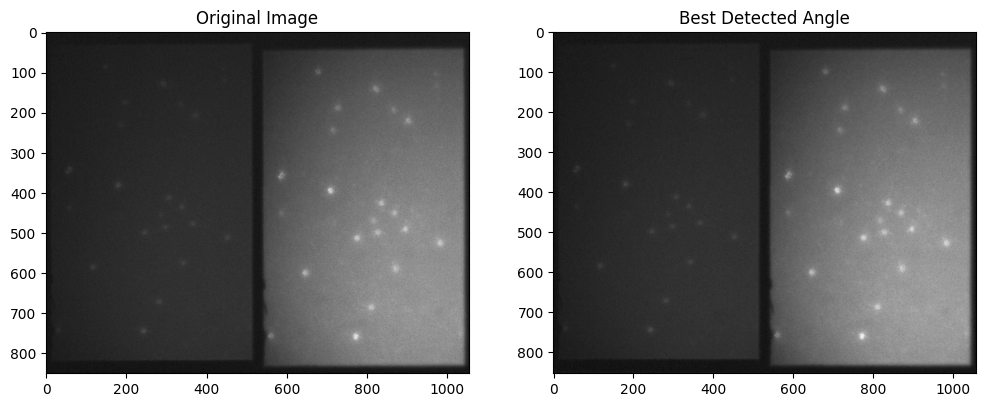

Rotating by skew angle...
Adaptive thresholding cam 0..
Determine skew angle...


100%|██████████| 31/31 [00:11<00:00,  2.58it/s]


Best Angle: 0.40000000000000036 degrees
Max Line Count: 678.0


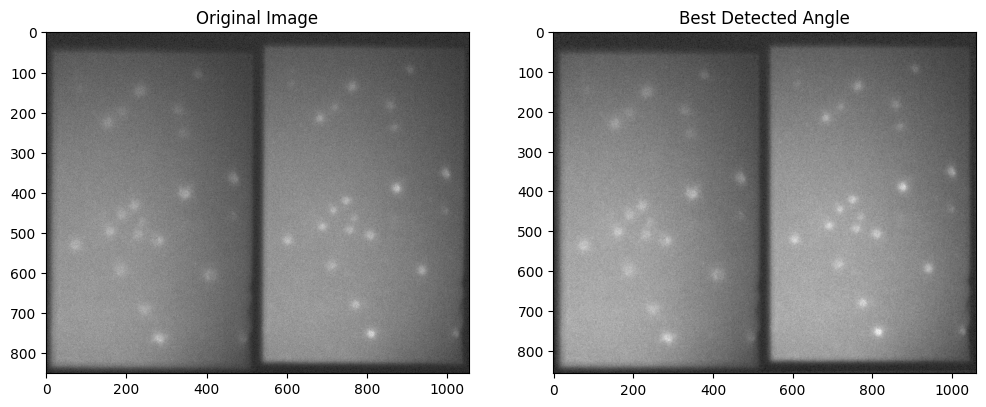

Rotating by skew angle...
Adaptive thresholding cam 1..
Cropping final fovs..
Estimating interplane distance..


SR-localising peaks:  25%|██▌       | 1/4 [00:18<00:54, 18.24s/it]

Skipped 6 / 250783 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  50%|█████     | 2/4 [00:39<00:39, 19.72s/it]

Skipped 11 / 253373 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  75%|███████▌  | 3/4 [01:16<00:27, 27.82s/it]

Skipped 4 / 414954 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 4/4 [01:49<00:00, 29.84s/it]

Skipped 3 / 446804 (0.00%) peaks in fitting due to irregular shape.


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 41.22it/s]


Determining relative z-distances and order
n_planes: 601


TypeError: string indices must be integers

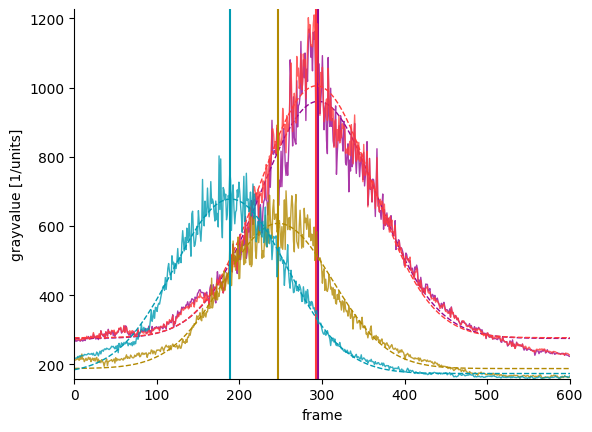

In [5]:
proc.calibrate(is_bead = True)

In [ ]:
proc.check_calibration()

In [ ]:
proc.execute()

In [1]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class
proc = MultiplaneProcess()
proc.select_data_directory(r'C:\Users\mengelhardt\data\local\KINETIX_4speck_642_2\cal_data')
proc.get_files_with_metadata()
# activate logging
proc.set_logging(True)
stack = proc.load_data()
stack = stack[:,50:-50:4,:,:]
#stack = stack[:,250:305,:,:]

stack.shape


(4, 601, 791, 505)

Estimating interplane distance..


SR-localising peaks:  25%|██▌       | 1/4 [00:34<01:43, 34.56s/it]

Skipped 11 / 253373 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks:  50%|█████     | 2/4 [01:06<01:05, 32.81s/it]

Skipped 123 / 193824 (0.06%) peaks in fitting due to irregular shape.


SR-localising peaks:  75%|███████▌  | 3/4 [02:08<00:46, 46.42s/it]

Skipped 2 / 439355 (0.00%) peaks in fitting due to irregular shape.


SR-localising peaks: 100%|██████████| 4/4 [03:03<00:00, 49.55s/it]

Skipped 1 / 396997 (0.00%) peaks in fitting due to irregular shape.


Tracking beads in z: 100%|██████████| 4/4 [07:26<00:00, 111.71s/it]


Determining relative z-distances and order
n_planes: 601


Convert datastructure: 100%|██████████| 4/4 [00:00<00:00, 15.85it/s]


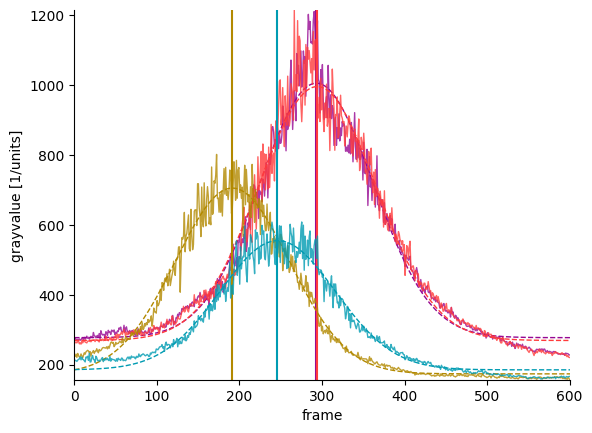

TypeError: string indices must be integers

In [2]:
tracks = proc.estimate_interplane_distance(stack)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

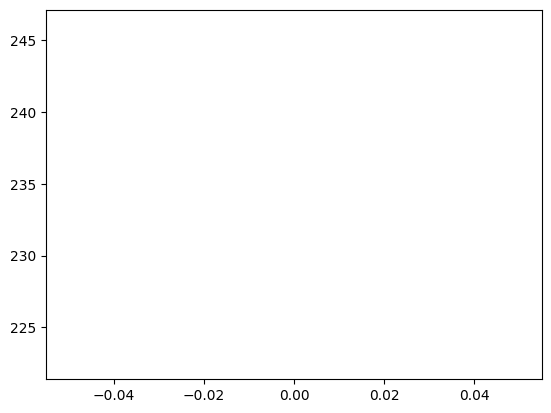

In [ ]:
plt.plot(np.mean(tracks[3]))

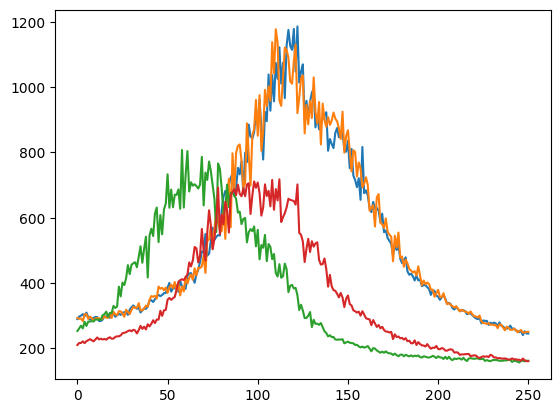

In [ ]:
for i in tracks.keys():
    plt.plot(np.mean(tracks[i][:,:,3], axis=0))

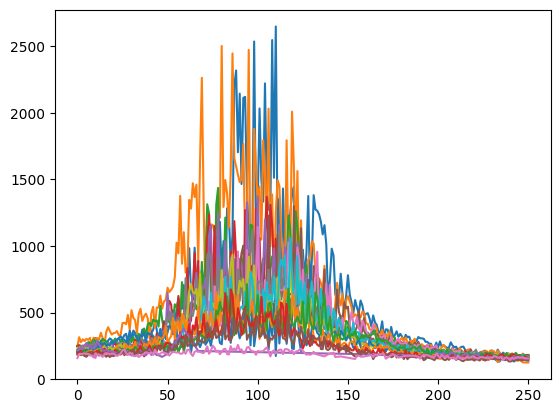

In [ ]:
f = plt.figure
tidx = 3
for t in range(tracks[tidx].shape[0]):
    plt.plot(tracks[tidx][t,:,3])

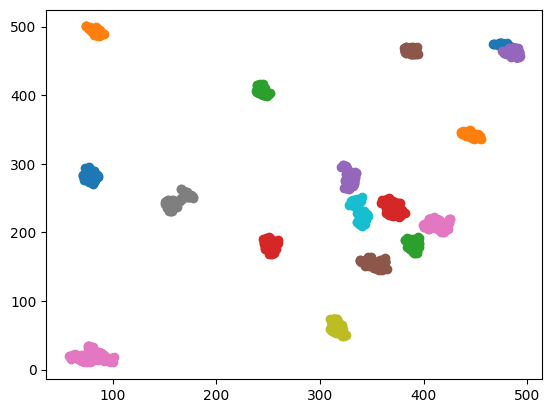

In [ ]:
f = plt.figure
tidx = 3
for t in range(tracks[tidx].shape[0]):
    plt.scatter(tracks[tidx][t,:,0], tracks[tidx][t,:,1])

In [ ]:
]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

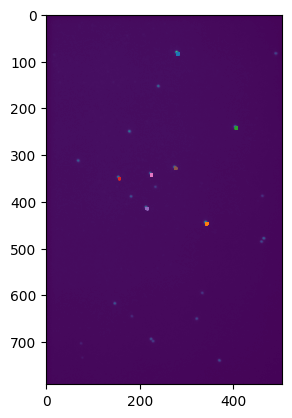

In [ ]:
f = plt.figure
stack_idx = 3

plt.imshow(np.max(stack[stack_idx,...], axis=0))
for tr in tracks[stack_idx].values():
    plt.scatter(tr[:,1], tr[:,0], s=1)

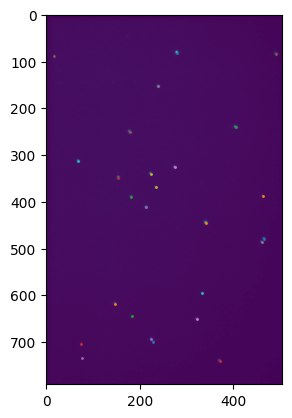

In [ ]:
stack_idx = 3

plt.imshow(np.max(stack[stack_idx,...], axis=0))
for b in range(beadc.shape[0]):
    plt.scatter(beadc[b,1], beadc[b,0], s=1)

In [6]:
tracks

'dz'